In [1]:
from pathlib import Path
this_file = Path('.').resolve()
project_directory = this_file.parent
project_directory
import pandas as pd
df = pd.read_csv(project_directory/'result_game1_evolve_static_single.py'/'optPop'/'Phen.csv', header=None, names=[f'station{i}'for i in range(1, 12+1)])
df = df.astype(int)
df.head()

,station1,station2,station3,station4,station5,station6,station7,station8,station9,station10,station11,station12
0,453,314,46,92,975,573,801,390,140,76,18,217


In [2]:
df.to_numpy()

array([[453, 314,  46,  92, 975, 573, 801, 390, 140,  76,  18, 217]])

In [3]:
import sys
sys.path.append(project_directory.as_posix())

In [4]:
import src.game1_evolve_static_multi as game
problem = game.WaterDropMarch()
f,cv = problem.evalVars(df.to_numpy())

In [5]:
import numpy as np
K = 1
-np.log(np.sum(np.exp(-K * f))) / K

2.623755107719404

In [6]:
f.min()

3.7265290000000006

In [7]:
import src.utils as utils
data = utils.get_data()
opportunity_list = utils.get_opportunity_list(data)
stations, asteroids = utils.get_stations_and_asteroids(opportunity_list)
opportunities = len(opportunity_list)
station_groups = opportunity_list.groupby('station')
group_indices = station_groups.indices

In [8]:
import src.representations as resp
vars = resp.make_vars(df.to_numpy())
raw_vars = resp.vars2raw_vars(vars, group_indices, opportunity_list)

In [9]:
raw_vars

array([[49.127, 53.823, 40.829, 44.588, 17.193, 20.114, 24.27 , 25.945,
        70.975, 80.1  , 54.823, 63.292, 64.292, 69.975, 45.588, 48.127,
        26.945, 32.801, 21.114, 23.27 ,  9.474, 16.193, 33.801, 39.829,
         7.   ,  1.   ,  7.   ,  1.   ,  2.   ,  2.   ,  6.   ,  1.   ,
         5.   ,  3.   ,  9.   ,  1.   ,  2.   ,  1.   ,  2.   ,  1.   ,
         1.   ,  3.   ,  2.   ,  1.   , 11.   ,  1.   ,  9.   ,  1.   ,
        11.   ,  1.   ,  9.   ,  1.   ,  8.   ,  1.   ,  5.   ,  1.   ,
         9.   ,  1.   , 11.   ,  1.   ,  1.   ,  1.   ,  1.   ,  2.   ,
         2.   ,  1.   ,  9.   ,  3.   ,  8.   ,  1.   ,  6.   ,  1.   ,
         9.   ,  1.   ,  4.   ,  3.   ,  3.   ,  1.   , 10.   ,  2.   ,
         1.   ,  1.   ,  1.   ,  1.   , 12.   ,  1.   ,  9.   ,  3.   ,
         6.   ,  1.   ,  7.   ,  1.   ,  1.   ,  2.   ,  4.   ,  2.   ,
         9.   ,  3.   ,  8.   ,  2.   ,  4.   ,  2.   ,  4.   ,  1.   ,
         3.   ,  1.   , 12.   ,  2.   ,  1.   ,  4.   ,  2.   , 

In [10]:
udp_vars = resp.raw_vars2udp_vars(raw_vars, )

In [11]:
udp_vars[0:, 0:24]
# udp_vars[0:, 24:24+6]
udp_vars[0:, 24::3]
np.unique(udp_vars[0:, 24+1::3])
np.unique(udp_vars[0:, 24+2::3])
# udp_vars[0:, 24+2::3]
# udp_vars[0:, 24:24+6:3]

array([0., 1., 2., 3., 4.])

In [12]:
pd.DataFrame(udp_vars[:, 24:].reshape(3, -1).T).to_csv('udp_vars.csv', index=False)

In [13]:
udp_vars[:, 24:].reshape(3, -1).T

array([[  1.,   5.,   1.],
       [  7.,   1., 228.],
       [  1., 115.,   5.],
       ...,
       [  5.,   2., 340.],
       [  1., 227.,   4.],
       [114.,   1.,   1.]])

In [14]:
from spoc_delivery_scheduling_evaluate_code import trappist_schedule
udp = trappist_schedule()

In [15]:
fit = udp.fitness(udp_vars[0, :])
fit
# udp.pretty(udp_vars[0, :])

(-3.7265286, 0, 0, 0.0, 0)

array([<AxesSubplot:xlabel='Station', ylabel='Material masses'>,
       <AxesSubplot:xlabel='Time [days]', ylabel='Station'>], dtype=object)

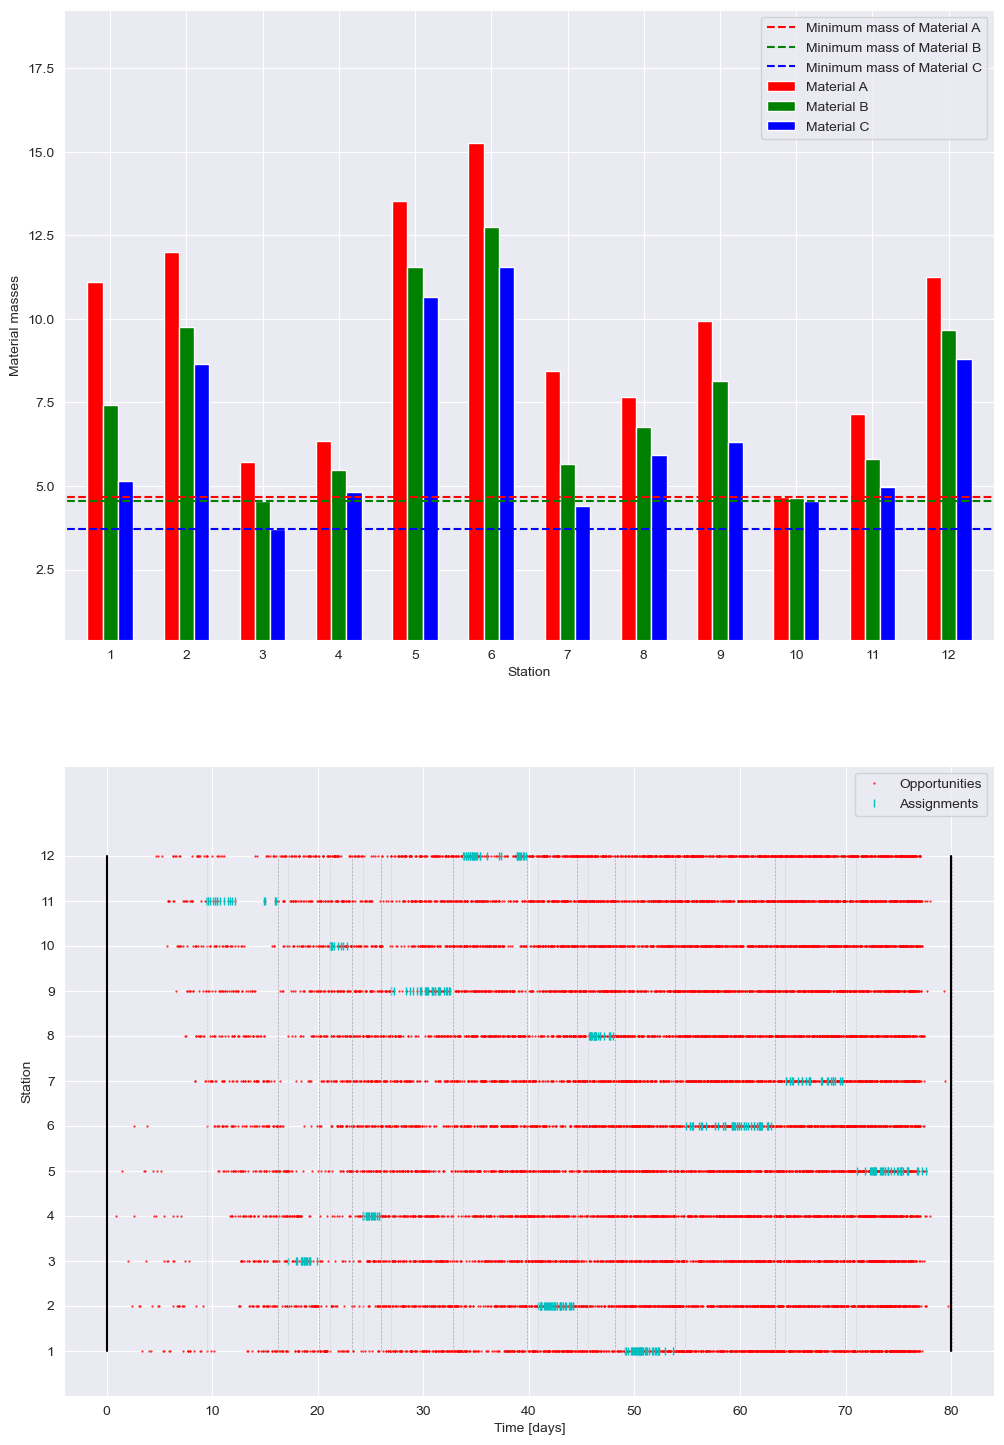

In [18]:
udp.plot(udp_vars[0, :])

In [16]:
f.min()
import math 
math.isclose(f.min(), -fit[0], abs_tol=1e-6)

True

In [17]:
f.min()+fit[0]

3.554382330683836e-07